In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [2]:

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
        #print(output_data)
    return output_data

In [3]:
# load the dataset
data = pd.read_csv('/content/Acetaminophen_mixture_CNN_Binary.csv', index_col=0)
data = pd.DataFrame(data)
data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)
y = data['label']
X = data.drop(['label'],axis=1)
X = X.values[:,2:]
X = snv(X)
X = pd.DataFrame(X)


(15, 15)


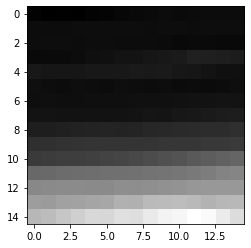

In [4]:
plot = X.values.reshape(900,15,15)
sample_plot =plot[0]
print(sample_plot.shape)
plt.imshow(sample_plot,cmap='gray')
plt.show()

In [5]:
# fit the keras model on the dataset
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

X_train = X_train.values.reshape(X_train.shape[0],15,15,1).astype('float32')
X_test= X_test.values.reshape(X_test.shape[0],15,15,1).astype('float32')
print(X_train.shape)

(720, 15, 15, 1)


In [6]:


n_timesteps = X_train.shape[1] 
n_features  = X_train.shape[2]  
model = keras.Sequential(name="model_conv2D")
model.add(keras.layers.Input(shape=(n_timesteps,n_features,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', name="Conv2D_1"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', name="Conv2D_2"))
model.add(keras.layers.Conv2D(filters=16, kernel_size=2, activation='relu', name="Conv2D_3"))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
model.add(keras.layers.Dense(n_features, name="Dense_2"))
model.add(keras.layers.Dense(1, activation='relu'))

model.compile(loss ='mse', optimizer='adam',metrics=['mse','mae'])

In [7]:
model.summary()

Model: "model_conv2D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 9, 9, 64)          3200      
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 5, 5, 32)          51232     
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 4, 4, 16)          2064      
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
Dense_2 (Dense)              (None, 15)                495       
_________________________________________________________________
dense (Dense)                (None, 1)                

In [8]:
history = model.fit(X_train, y_train, epochs=20,verbose=1)

Epoch 1/20
23/23 [==============================] - 1s 17ms/step - loss: 0.0684 - mse: 0.0684 - mae: 0.1926
Epoch 2/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0681
Epoch 3/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0534
Epoch 4/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0359
Epoch 5/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0348
Epoch 6/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0350
Epoch 7/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0332
Epoch 8/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0382
Epoch 9/20
23/23 [==============================] - 0s 16ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0309
Epoch 10/20
23/23 [=========

In [9]:
myst = pd.read_csv('/content/Mystery_testing_data.csv', index_col=0)
myst = pd.DataFrame(myst)
predictions =[]
myst_predictions = pd.DataFrame(myst["label_name"])
myst.drop(['label_name'], axis=1, inplace=True)
# Applying SNV to myst data
myst = myst.values[:,2:]
myst = snv(myst)
myst = pd.DataFrame(myst)
myst= myst.values.reshape(myst.shape[0],15,15,1).astype('float32')
preds = model.predict(myst)
print(preds)

se = pd.Series(preds.tolist())
for i in range(0, 100):
  
  predictions.append((sum(se[i])/len(se[i])))

myst_predictions.insert(loc=1, column='predictions', value=predictions)
myst_predictions.to_csv('/content/Mystery_Prediction_2DCNN.csv')

[[0.9333862 ]
 [0.92843604]
 [0.92312217]
 [0.91998667]
 [0.9212801 ]
 [0.92999953]
 [0.92529106]
 [0.9310182 ]
 [0.9274542 ]
 [0.93268436]
 [1.021801  ]
 [1.0233074 ]
 [1.0308566 ]
 [1.0211815 ]
 [1.0199043 ]
 [1.0292813 ]
 [1.0271817 ]
 [1.025585  ]
 [1.0376095 ]
 [1.0269985 ]
 [0.48374692]
 [0.5102906 ]
 [0.49615803]
 [0.5020689 ]
 [0.4845391 ]
 [0.5039383 ]
 [0.48851755]
 [0.48312846]
 [0.4428194 ]
 [0.4968213 ]
 [0.9174953 ]
 [0.90650785]
 [0.9086519 ]
 [0.9106797 ]
 [0.9191817 ]
 [0.915427  ]
 [0.9055297 ]
 [0.90558004]
 [0.9051101 ]
 [0.901049  ]
 [0.5397017 ]
 [0.49350655]
 [0.3912345 ]
 [0.5012315 ]
 [0.42583254]
 [0.5238148 ]
 [0.53471047]
 [0.48757005]
 [0.4521045 ]
 [0.48120424]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07679906]
 [0.05350445]
 [0.08789818]
 [0.09079485]
 [0.09719572]
 [0.0698638 ]
 [0.05954381]
 [0.09455407]
 [0.07263627]
 [0.11978035]
 [0.830276  ]
 [0.83

In [10]:
#Predicting Ternary Samples Data
data = pd.read_csv('/content/ternary_samples.csv', index_col=0)
data = pd.DataFrame(data)
ternary_predictions = pd.DataFrame()

ternary_predictions["label_name"] =data["label_name"]
ternary_predictions['Actual'] = data['label']

data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)

y = data['label']
X = data.drop(['label'],axis=1)
X = X.values[:,2:]
X = snv(X)
X = pd.DataFrame(X)

ternary= X.values.reshape(X.shape[0],15,15,1).astype('float32')
preds = model.predict(ternary)
print(preds)
se = pd.Series(preds.tolist())
ternary_predictions.insert(loc=0, column='predictions', value=se.values)
#Saving results
ternary_predictions.to_csv('/content/Ternary_Prediction_2DCNN.csv')

[[0.349765  ]
 [0.3838805 ]
 [0.30026108]
 [0.30969006]
 [0.27627647]
 [0.2708066 ]
 [0.28544706]
 [0.33019683]
 [0.36695874]
 [0.3021411 ]
 [0.3273791 ]
 [0.29410964]
 [0.32173425]
 [0.29763454]
 [0.2956482 ]
 [0.33902216]
 [0.29095665]
 [0.3291514 ]
 [0.30454752]
 [0.39096698]
 [0.3570181 ]
 [0.30555502]
 [0.2950413 ]
 [0.35809052]
 [0.3221772 ]
 [0.29248887]
 [0.28230575]
 [0.2939815 ]
 [0.29409727]
 [0.38992232]
 [0.30039838]
 [0.3302365 ]
 [0.31702995]
 [0.33601552]
 [0.34322667]
 [0.3059662 ]
 [0.3106357 ]
 [0.29276377]
 [0.280842  ]
 [0.3220816 ]
 [0.31036386]
 [0.39348325]
 [0.350999  ]
 [0.30454972]
 [0.34617776]
 [0.37219203]
 [0.3313513 ]
 [0.3411354 ]
 [0.30389604]
 [0.29468226]
 [0.36208045]
 [0.33030632]
 [0.32654473]
 [0.3318822 ]
 [0.29873508]
 [0.31778678]
 [0.3556054 ]
 [0.30890164]
 [0.30690143]
 [0.39294365]
 [0.30006316]
 [0.3202448 ]
 [0.31456217]
 [0.36385784]
 [0.3106072 ]
 [0.30725813]
 [0.31423122]
 [0.31061083]
 [0.3424644 ]
 [0.2955848 ]
 [0.3272096 ]
 [0.35

In [11]:
#Predicting Tylenol Data
data = pd.read_csv('tylenol_topcare_samples.csv', index_col=0)
data = pd.DataFrame(data)
ternary_predictions = pd.DataFrame()

ternary_predictions["label_name"] =data["label_name"]


data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)

X = data.values[:,2:]
X = snv(X)
X = pd.DataFrame(X)

ternary= X.values.reshape(X.shape[0],15,15,1).astype('float32')
preds = model.predict(ternary)
print (preds)

se = pd.Series(preds.tolist())
ternary_predictions.insert(loc=0, column='predictions', value=se.values)
#Saving results
ternary_predictions.to_csv('/content/Tylenol_Prediction_2DCNN.csv')

[[0.09433368]
 [0.0987172 ]
 [0.11146257]
 ...
 [0.53112155]
 [0.48986962]
 [0.5315218 ]]
